In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0



In [27]:
X_train.shape

(60000, 28, 28, 1)

In [28]:
y_train.shape

(60000,)

In [21]:
model = Sequential()

In [29]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [30]:
y_train[0]

9

In [21]:
#create model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#train the model
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7243 - loss: 2.9539 - val_accuracy: 0.8292 - val_loss: 0.4899
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8373 - loss: 0.4342 - val_accuracy: 0.8729 - val_loss: 0.3649
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8888 - loss: 0.2998 - val_accuracy: 0.8848 - val_loss: 0.3236
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9087 - loss: 0.2525 - val_accuracy: 0.8881 - val_loss: 0.3190
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9153 - loss: 0.2299 - val_accuracy: 0.8890 - val_loss: 0.3296


In [ ]:
epochs = 100
batch_size = 512

history = model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(x_test, y_test)
)


In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1]) 

In [49]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 0, 'T-shirt/top')

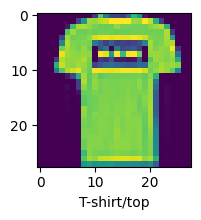

In [35]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])
plt.xlabel(class_names[y_train[1]])



In [36]:
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
y_predict = model.predict(X_test)

In [43]:
y_predict[0]

array([1.9101694e-04, 4.4934704e-06, 1.4351295e-05, 2.3780842e-07,
       6.5390107e-09, 9.9910212e-01, 1.8942987e-05, 5.3323558e-05,
       6.1549281e-04, 2.9819823e-08], dtype=float32)

In [51]:
y_pred =y_predict.argmax(axis=0)

In [28]:
loss, acc = model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1073 - loss: 2.3441


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.10769999772310257


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
